In [29]:
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [30]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [31]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [32]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

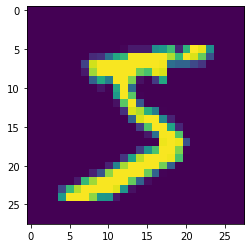

In [34]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [35]:
X_train = X_train/255 
X_test = X_test/255 

In [36]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [37]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [40]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2796 - accuracy: 0.9185 - val_loss: 0.1377 - val_accuracy: 0.9593
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1179 - accuracy: 0.9646 - val_loss: 0.1247 - val_accuracy: 0.9607
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0816 - accuracy: 0.9752 - val_loss: 0.1075 - val_accuracy: 0.9677
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0619 - accuracy: 0.9802 - val_loss: 0.0925 - val_accuracy: 0.9716
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0921 - val_accuracy: 0.9754
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.1012 - val_accuracy: 0.9735
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0308 - accuracy: 0.9898 - val_loss: 0.1055 - val_accuracy:

In [41]:
y_prob = model.predict(X_test)

In [42]:
y_prad = y_prob.argmax(axis=1)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prad)

0.9728

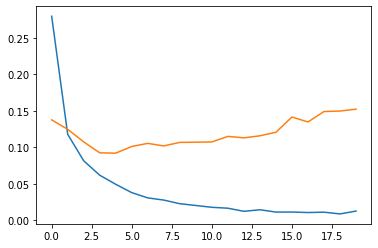

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

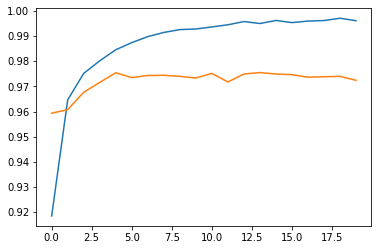

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

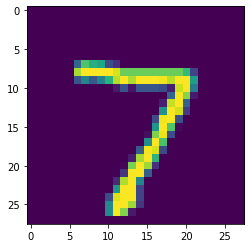

In [46]:
plt.imshow(X_test[0])
plt.show()

In [47]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

array([7])